In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
import random
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [2]:
data_events = pd.read_csv("data_events_sample.csv")
purchase_events = pd.read_csv("purchase_events_sample.csv")


In [3]:
data_events.head()

,TIMESTAMP_EVENT,PRICE,PROPOSITION,USER_CLIENT_NUMBER,ARTICLE_CATEGORIE,USER_SESSION_ID,PROMOTION_LABEL,PAGE_NAME,PAGE_SECTION,PAGE_SECTION_POSITION,...,PRODUCT_TYPE,DEVICE_INFO_BRAND,DEVICE_INFO_TYPE,DEVICE_INFO_BROWSER,USER_SALES_GROUP,USER_SEGMENT,USER_SALES_DISTRICT,USER_PROMOTIONS_ALLOWED,EVENT,PROMOTION_PRICE
0,2022-03-24T15:17:27.041Z,39.1248,67795,763956,"1,101,781,000",47920,20%25%20korting,Shopping Cart,Recommended Products,2.0,...,Meepakker,(Windows) PC,COMPUTER,Chrome 99.0.4844.74,Hotel Restaurant,restauratief,Groningen,1,VIEW,31.2972
1,2022-01-25T12:31:18.664Z,62.3832,192360,591921,"1,101,791,010",70923,no promotion,others,not recommended,0.0,...,others,,COMPUTER,Chrome 97.0.4692.77,Zorg Overig Algemeen,zorg,Hoofddorp,1,ADD_TO_CARD,0.0000
2,2022-03-16T14:23:28.490Z,16.7376,284988,144567,"1,091,621,316",256691,no promotion,others,not recommended,0.0,...,others,(Windows) PC,COMPUTER,Chrome 99.0.4844.51,Rest. dag/avondkaart,restauratief,Hoofddorp,1,ADD_TO_CARD,0.0000
3,2022-01-23T15:38:28.392Z,11.0484,248504,43389,"1,061,271,285",318858,20%25%20korting,Shopping Cart,Recommended Products,1.0,...,Meepakker,,COMPUTER,Chrome 94.0.4606.124,Verpl/Verz Restaur,zorg,Schiedam,1,VIEW,8.8440
4,2022-03-13T15:01:33.264Z,42.5172,40050,185712,"1,101,761,030",167729,no promotion,others,not recommended,0.0,...,others,Apple Macintosh,COMPUTER,Chrome 89.0.4389.90,Restaur. dagkaart,restauratief,Tilburg,1,ADD_TO_CARD,0.0000


In [4]:
purchase_events.head()

,PROPOSITION,USER_CLIENT_NUMBER,DATE,AMOUNT
0,692611,280187,2021-10-19 00:00:00,55.22
1,706870,615463,2021-11-09 00:00:00,33.86
2,607268,98679,2022-04-06 00:00:00,75.40
3,211805,803697,2022-03-24 00:00:00,188.18
4,453929,379568,2022-02-09 00:00:00,148.50


In [5]:
data_events['TIMESTAMP_EVENT'] = pd.to_datetime(data_events['TIMESTAMP_EVENT'])
purchase_events['DATE'] = pd.to_datetime(purchase_events['DATE'])

# Merge the datasets on common keys 'PROPOSITION' and 'USER_CLIENT_NUMBER'
full_data = pd.merge(data_events, purchase_events, on=['PROPOSITION', 'USER_CLIENT_NUMBER'], how='left')


In [6]:
full_data

,TIMESTAMP_EVENT,PRICE,PROPOSITION,USER_CLIENT_NUMBER,ARTICLE_CATEGORIE,USER_SESSION_ID,PROMOTION_LABEL,PAGE_NAME,PAGE_SECTION,PAGE_SECTION_POSITION,...,DEVICE_INFO_TYPE,DEVICE_INFO_BROWSER,USER_SALES_GROUP,USER_SEGMENT,USER_SALES_DISTRICT,USER_PROMOTIONS_ALLOWED,EVENT,PROMOTION_PRICE,DATE,AMOUNT
0,2022-03-24 15:17:27.041000+00:00,39.1248,67795,763956,"1,101,781,000",47920,20%25%20korting,Shopping Cart,Recommended Products,2.0,...,COMPUTER,Chrome 99.0.4844.74,Hotel Restaurant,restauratief,Groningen,1,VIEW,31.2972,NaT,NaN
1,2022-01-25 12:31:18.664000+00:00,62.3832,192360,591921,"1,101,791,010",70923,no promotion,others,not recommended,0.0,...,COMPUTER,Chrome 97.0.4692.77,Zorg Overig Algemeen,zorg,Hoofddorp,1,ADD_TO_CARD,0.0000,2022-04-07,162.89
2,2022-03-16 14:23:28.490000+00:00,16.7376,284988,144567,"1,091,621,316",256691,no promotion,others,not recommended,0.0,...,COMPUTER,Chrome 99.0.4844.51,Rest. dag/avondkaart,restauratief,Hoofddorp,1,ADD_TO_CARD,0.0000,NaT,NaN
3,2022-01-23 15:38:28.392000+00:00,11.0484,248504,43389,"1,061,271,285",318858,20%25%20korting,Shopping Cart,Recommended Products,1.0,...,COMPUTER,Chrome 94.0.4606.124,Verpl/Verz Restaur,zorg,Schiedam,1,VIEW,8.8440,NaT,NaN
4,2022-03-13 15:01:33.264000+00:00,42.5172,40050,185712,"1,101,761,030",167729,no promotion,others,not recommended,0.0,...,COMPUTER,Chrome 89.0.4389.90,Restaur. dagkaart,restauratief,Tilburg,1,ADD_TO_CARD,0.0000,2022-03-21,96.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1841977,2022-02-28 09:19:58.145000+00:00,20.4204,118713,293304,"1,091,611,119",343485,no promotion,others,not recommended,0.0,...,PHONE,Stock Browser,Cafetaria +,fastservice,Helmond,1,ADD_TO_CARD,0.0000,2021-10-05,302.15
1841978,2022-02-28 09:19:58.145000+00:00,20.4204,118713,293304,"1,091,611,119",343485,no promotion,others,not recommended,0.0,...,PHONE,Stock Browser,Cafetaria +,fastservice,Helmond,1,ADD_TO_CARD,0.0000,2021-11-26,161.15
1841979,2022-03-14 22:21:01.536000+00:00,10.0056,897236,928012,"1,081,411,508",97075,no promotion,Purchase List,Recommended Products,1.0,...,COMPUTER,Safari 15.1,Aziatisch Cafetaria,fastservice,Groningen,1,VIEW,0.0000,NaT,NaN
1841980,2022-01-25 19:41:41.332000+00:00,71.9268,182389,16692,"1,091,661,550",161405,40%25%20korting,Shopping Cart,Recommended Products,4.0,...,COMPUTER,Safari 15.1,Restaur. dagkaart,restauratief,Emmen,1,VIEW,43.1508,NaT,NaN


 Feature Engineering
segmentation:

Recency (R): Time since last purchase.
Frequency (F): Total number of purchases.
Monetary (M): Total spending.

In [7]:
# Group by user and aggregate data
user_data = full_data.groupby('USER_CLIENT_NUMBER').agg({
    'DATE': 'max',  # Most recent purchase date
    'PROPOSITION': 'count',  # Frequency of purchases
    'AMOUNT': 'sum'  # Total amount spent
}).rename(columns={'DATE': 'Recent_Purchase_Date', 'PROPOSITION': 'Total_Purchases', 'AMOUNT': 'Total_Spent'})

# Calculate recency in days from the most recent date in the dataset
most_recent_date = full_data['DATE'].max()
user_data['Recency'] = (most_recent_date - user_data['Recent_Purchase_Date']).dt.days


In [8]:
# Customer Segmentation: quantile-based segmentation method 

# Use quantiles to segment each RFM feature
quantiles = user_data[['Recency', 'Total_Purchases', 'Total_Spent']].quantile(q=[0.25, 0.5, 0.75])
def rfm_segment(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

user_data['R_Score'] = user_data['Recency'].apply(rfm_segment, args=('Recency', quantiles))
user_data['F_Score'] = user_data['Total_Purchases'].apply(rfm_segment, args=('Total_Purchases', quantiles))
user_data['M_Score'] = user_data['Total_Spent'].apply(rfm_segment, args=('Total_Spent', quantiles))


With segmented data, analyze patterns and develop targeted marketing strategies:

High Value Customers: Top RFM scores. Develop loyalty programs or premium offers.
At-Risk Customers: High monetary and frequency scores but low recency score. Re-engage with personalized promotions.
Low-Value Customers: Low scores across RFM. Explore up-sell and cross-sell opportunities to increase their value.

In [9]:
# Define a simple function to assign recommendations based on RFM scores
def assign_recommendations(row):
    if row['R_Score'] == 4 and row['F_Score'] == 4 and row['M_Score'] == 4:
        return 'Premium Product Line'
    elif row['R_Score'] == 1 and row['F_Score'] >= 3:
        return 'Re-engagement Campaign'
    else:
        return 'Regular Promotions'

user_data['Recommendations'] = user_data.apply(assign_recommendations, axis=1)


In [29]:
user_data
# Use the insights from the RFM segmentation to fuel your recommendation engine, which will suggest products based on the user's segment.

,Recent_Purchase_Date,Total_Purchases,Total_Spent,Recency,R_Score,F_Score,M_Score,Recommendations
USER_CLIENT_NUMBER,,,,,,,,
193,NaT,1,0.00,NaN,4,1,1,Regular Promotions
230,2022-04-28,141,605.72,0.0,1,3,2,Re-engagement Campaign
272,NaT,9,0.00,NaN,4,1,1,Regular Promotions
436,2022-04-14,72,587.02,14.0,3,3,2,Regular Promotions
467,NaT,3,0.00,NaN,4,1,1,Regular Promotions
...,...,...,...,...,...,...,...,...
999388,2022-04-22,21,178.28,6.0,3,2,2,Regular Promotions
999500,2022-04-26,46,198.12,2.0,1,2,2,Regular Promotions
999513,NaT,6,0.00,NaN,4,1,1,Regular Promotions


In [19]:
contexts = user_data[['R_Score', 'F_Score', 'M_Score']].values  
actions = user_data['Recommendations']  
rewards = user_data['Total_Spent'] > user_data['Total_Spent'].quantile(0.75)  # High spend as a reward signal

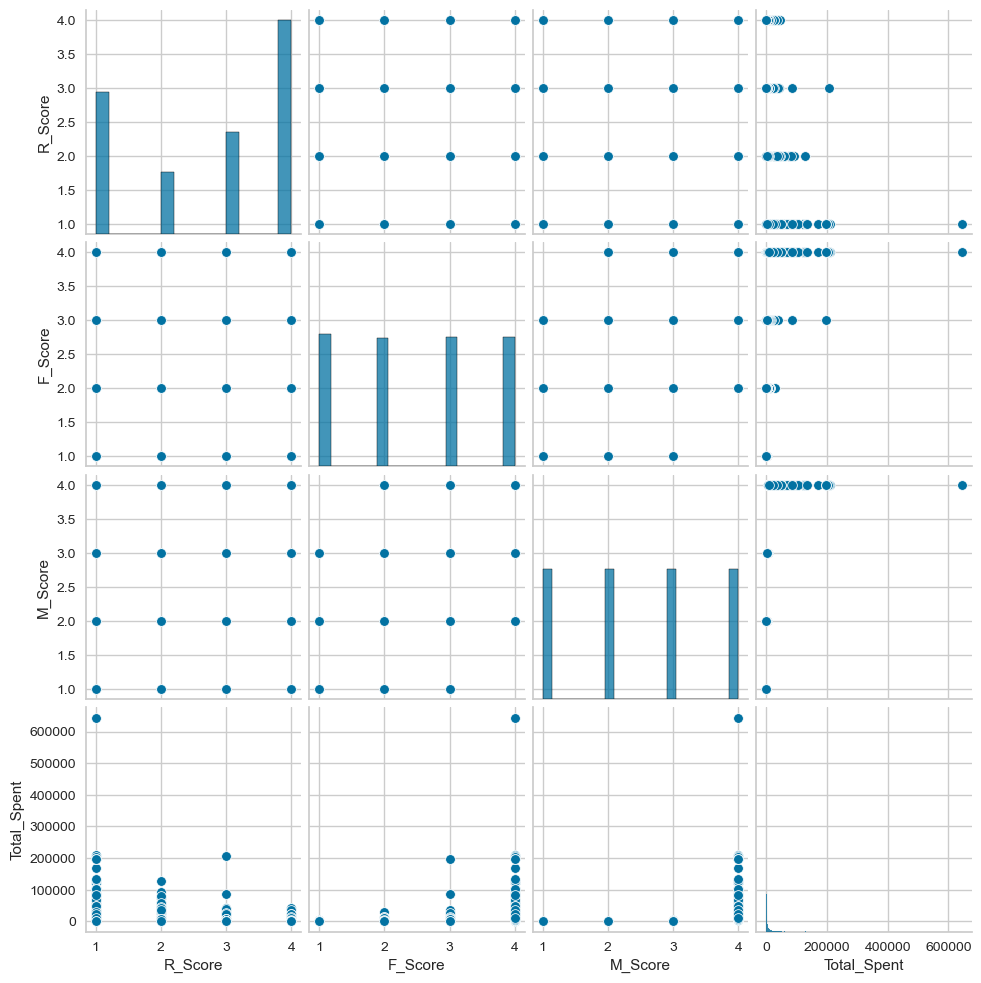

              R_Score   F_Score   M_Score  Total_Spent
R_Score      1.000000 -0.749983 -0.740586    -0.352499
F_Score     -0.749983  1.000000  0.888690     0.410046
M_Score     -0.740586  0.888690  1.000000     0.428232
Total_Spent -0.352499  0.410046  0.428232     1.000000


In [18]:
# policy 
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing the RFM scores and total spending
sns.pairplot(user_data[['R_Score', 'F_Score', 'M_Score', 'Total_Spent']])
plt.show()

# Correlation matrix
print(user_data[['R_Score', 'F_Score', 'M_Score', 'Total_Spent']].corr())


In [20]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoded_actions = encoder.fit_transform(actions)
action_names = encoder.classes_  # To keep track of what each number represents


In [21]:
import numpy as np

class EpsilonGreedyBandit:
    def __init__(self, epsilon, n_actions):
        self.epsilon = epsilon
        self.n_actions = n_actions
        self.action_counts = np.zeros(n_actions, dtype=int)
        self.action_values = np.zeros(n_actions, dtype=float)

    def select_action(self):
        if np.random.random() < self.epsilon:
            action = np.random.choice(self.n_actions)
        else:
            action = np.argmax(self.action_values)
        return action

    def update(self, action, reward):
        self.action_counts[action] += 1
        n = self.action_counts[action]
        value = self.action_values[action]
        # Update using incremental formula
        self.action_values[action] += (reward - value) / n

# Number of unique actions
n_actions = len(np.unique(encoded_actions))

# Initialize bandit
bandit = EpsilonGreedyBandit(epsilon=0.1, n_actions=n_actions)

# Simulate decision process
for context, action, reward in zip(contexts, encoded_actions, rewards):
    chosen_action = bandit.select_action()
    actual_reward = reward if action == chosen_action else 0
    bandit.update(chosen_action, actual_reward)


In [24]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Encode the actions
encoder = LabelEncoder()
encoded_actions = encoder.fit_transform(user_data['Recommendations'])
action_names = encoder.classes_  # To understand what each encoded action means

class EpsilonGreedyBandit:
    def __init__(self, epsilon, n_actions):
        self.epsilon = epsilon
        self.n_actions = n_actions
        self.action_counts = np.zeros(n_actions, dtype=int)
        self.action_rewards = np.zeros(n_actions, dtype=float)

    def update(self, action, reward):
        self.action_counts[action] += 1
        n = self.action_counts[action]
        value = self.action_rewards[action]
        self.action_rewards[action] += (reward - value) / n


In [30]:
user_data['Recommendations'].unique()

array(['Regular Promotions', 'Re-engagement Campaign',
       'Premium Product Line'], dtype=object)

In [25]:
# Initialize bandit
n_actions = len(np.unique(encoded_actions))
bandit = EpsilonGreedyBandit(epsilon=0.1, n_actions=n_actions)

# Update bandit with historical data
for action, reward in zip(encoded_actions, rewards):
    bandit.update(action, reward)

# Review the learned values
print("Action Values: ", bandit.action_rewards)
print("Action Counts: ", bandit.action_counts)

#Action Values: Understand which actions were most valuable based on historical data.
# Action Counts: Check how often each action was historically chosen.

Action Values:  [1.         0.64538731 0.11585909]
Action Counts:  [  52 2569 7863]


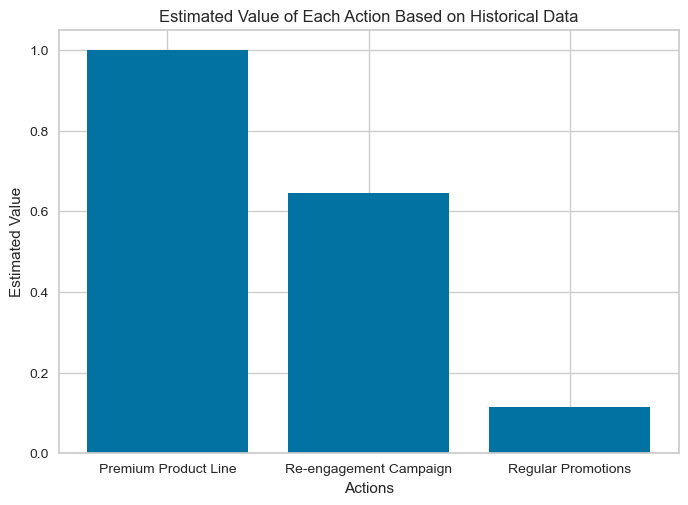

In [31]:
import matplotlib.pyplot as plt

# Plotting the rewards
plt.bar(action_names, bandit.action_rewards)
plt.xlabel('Actions')
plt.ylabel('Estimated Value')
plt.title('Estimated Value of Each Action Based on Historical Data')
plt.show()


In [ ]:
# Thompson Sampling Bandit
